In [ ]:
from IPython.display import Video
import os

width = 600
source = r'W:\PycharmProjects\kaggle-DFL\kaggle-dfl-bundesliga-data-shootout\test\0b1495d3_0.mp4'

In [20]:
import matplotlib.pyplot as plt
import cv2
from glob import glob
# img = cv2.imread(r'W:\PycharmProjects\kaggle-DFL\yolov7\yolov7\runs\detect\test3\4ffd5986_0_012103.jpg')
# plt.imshow(img)

In [47]:
def img_resize(img,txt_path):

    h = 1080
    w = 1920
    resize_para = [h-1,0,w-1,0] # up,down,left,right
    with open(txt_path,'r') as f:
        data = f.read()
    for row in data.split('\n'):
        if len(row.split(' ')) == 5:
            # print(row.split(' '))
            wp = float(row.split(' ')[1].strip())
            hp = float(row.split(' ')[2].strip())
            bbox_w = float(row.split(' ')[3].strip())
            bbox_h = float(row.split(' ')[4].strip())
            resize_para[0] = min(resize_para[0], int(h*hp - h*bbox_h/2))
            resize_para[1] = max(resize_para[1], int(h*hp + h*bbox_h/2))
            resize_para[2] = min(resize_para[2], int(w*wp - w*bbox_w/2))
            resize_para[3] = max(resize_para[3], int(w*wp + w*bbox_w/2))

    resized_img = img[resize_para[0]:resize_para[1],resize_para[2]:resize_para[3]]
    # print(resized_img.shape)
    return resized_img

保存所有裁剪后的图片

In [48]:
for i in ['train','val']:
    for classes in ['background','challenge','play','throwin']:
        img_path = f'work2/split_images/{i}/{classes}/*'
        target_path = f'work2/cuted_images/{i}/{classes}/'
        txt_paths = f'work2/txt/{i}/{classes}/'
        imgs = glob(img_path)

        for img in imgs:
            # print(img)
            img_num = img.split('\\')[-1]
            # print(img_num)
            txt_path = txt_paths+ img_num.split('.')[0] + '.txt'
            img = cv2.imread(img)
            res_img = img_resize(img,txt_path)
            # print(res_img.shape)

            cv2.imwrite(target_path+img_num,res_img)

        print(f'{classes} done')



background done
challenge done
play done
throwin done
background done
challenge done
play done
throwin done


['1', '0.549479', '0.40787', '0.0135417', '0.0583333']
['2', '0.572917', '0.616667', '0.0197917', '0.0592593']
['3', '0.838542', '0.535185', '0.0229167', '0.0444444']
['3', '0.29349', '0.425463', '0.0119792', '0.0601852']
['3', '0.574479', '0.583796', '0.0177083', '0.0694444']
['3', '0.549479', '0.408796', '0.0145833', '0.0601852']
['0', '0.483333', '0.654167', '0.00625', '0.0101852']
['2', '0.758854', '0.374074', '0.015625', '0.0685185']
['3', '0.170573', '0.563889', '0.0171875', '0.0666667']
['2', '0.838021', '0.535185', '0.021875', '0.0481481']
['2', '0.745313', '0.625926', '0.0208333', '0.0851852']
['0', '0.485156', '0.651852', '0.0078125', '0.0111111']
['1', '0.758333', '0.375463', '0.015625', '0.0675926']
['1', '0.745313', '0.623148', '0.0197917', '0.0759259']
['2', '0.622917', '0.787037', '0.0208333', '0.0907407']
['2', '0.93125', '0.59537', '0.0197917', '0.0796296']
['1', '0.856771', '0.498148', '0.0208333', '0.0555556']
['1', '0.839583', '0.534722', '0.025', '0.0546296']
['2',

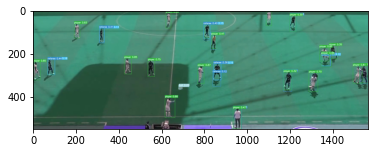

In [19]:
txt_path = r'W:\PycharmProjects\kaggle-DFL\yolov7\yolov7\runs\detect\test3\labels\4ffd5986_0_012103.txt'
h = 1080
w = 1920
resize_para = [h-1,0,w-1,0] # up,down,left,right
with open(txt_path,'r') as f:
    data = f.read()
for row in data.split('\n'):
    if len(row.split(' ')) == 5:
        print(row.split(' '))
        wp = float(row.split(' ')[1].strip())
        hp = float(row.split(' ')[2].strip())
        bbox_w = float(row.split(' ')[3].strip())
        bbox_h = float(row.split(' ')[4].strip())
        resize_para[0] = min(resize_para[0], int(h*hp - h*bbox_h/2))
        resize_para[1] = max(resize_para[1], int(h*hp + h*bbox_h/2))
        resize_para[2] = min(resize_para[2], int(w*wp - w*bbox_w/2))
        resize_para[3] = max(resize_para[3], int(w*wp + w*bbox_w/2))

print(resize_para)
img.shape # (1080, 1920, 3) h w c
img = img[resize_para[0]:resize_para[1],resize_para[2]:resize_para[3]]
plt.imshow(img